In [519]:
#import libraries needed for the project

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_regression

In [520]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


### Examining the Data

In [521]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41155 entries, 0 to 41154
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    41155 non-null  float64 
 1   cut      41155 non-null  category
 2   color    41155 non-null  category
 3   clarity  41155 non-null  category
 4   depth    41155 non-null  float64 
 5   table    41154 non-null  float64 
 6   price    41154 non-null  float64 
 7   x        41154 non-null  float64 
 8   y        41154 non-null  float64 
 9   z        41154 non-null  float64 
dtypes: category(3), float64(7)
memory usage: 2.3 MB


In [522]:
diamonds.nunique()

carat        273
cut            5
color          7
clarity        8
depth        170
table        109
price      10095
x            554
y            550
z            373
dtype: int64

From the examined data, I noticed that table, price, x, y and z columns contain 1 null value.

Cut, color and clarity are categorical columns, definitely not dichotomous variables because they contain more that 2 categories.

Color is likely to be norminal. Usually it's just for preference....usually!

In [523]:
#Checking duplicates

diamonds[diamonds.duplicated(keep=False)]

,carat,cut,color,clarity,depth,table,price,x,y,z
1004,0.79,Ideal,G,SI1,62.3,57.0,2898.0,5.90,5.85,3.66
1005,0.79,Ideal,G,SI1,62.3,57.0,2898.0,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898.0,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898.0,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898.0,5.90,5.85,3.66
...,...,...,...,...,...,...,...,...,...,...
40096,0.33,Ideal,G,VVS1,62.0,56.0,1114.0,4.48,4.45,2.77
40462,0.32,Ideal,D,VVS1,61.8,56.0,1140.0,4.41,4.39,2.72
40464,0.32,Ideal,D,VVS1,61.8,56.0,1140.0,4.41,4.39,2.72
41123,0.60,Premium,D,SI2,62.0,57.0,1196.0,5.43,5.35,3.34


In [524]:
#checking the types of categories in the categorical columns.
catCols = ['cut', 'color', 'clarity']

for i in catCols:
    print(i)
    print(diamonds[i].value_counts())
    print(" ")


cut
Ideal        16030
Premium      11160
Very Good     9094
Good          3697
Fair          1174
Name: cut, dtype: int64
 
color
G    8665
E    7122
F    7110
H    6707
D    4932
I    4323
J    2296
Name: color, dtype: int64
 
clarity
SI1     9746
VS2     9196
SI2     7551
VS1     6247
VVS2    3739
VVS1    2740
IF      1370
I1       566
Name: clarity, dtype: int64
 


### Cleaning the data

In [525]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [526]:
#Removing duplicates
diamonds.drop_duplicates(keep='first', inplace=True)

#Removing null records
diamonds.dropna(inplace=True)

diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41025 entries, 0 to 41153
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    41025 non-null  float64 
 1   cut      41025 non-null  category
 2   color    41025 non-null  category
 3   clarity  41025 non-null  category
 4   depth    41025 non-null  float64 
 5   table    41025 non-null  float64 
 6   price    41025 non-null  float64 
 7   x        41025 non-null  float64 
 8   y        41025 non-null  float64 
 9   z        41025 non-null  float64 
dtypes: category(3), float64(7)
memory usage: 2.6 MB


In [527]:
#Renaming the x, y and z columns to meaningful names
rename_columns = {
    'x':'length_mm',
    'y':'width_mm',
    'z':'depth_mm',
    'depth':'depth_pct'
}

diamonds.rename(columns=rename_columns, inplace=True)
diamonds.head()

,carat,cut,color,clarity,depth_pct,table,price,length_mm,width_mm,depth_mm
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


# Simple Linear Regression Model

In [528]:
diamonds_correlation = diamonds.corr()[['price']].sort_values(by='price', ascending=False)
diamonds_correlation

,price
price,1.000000
carat,0.919202
length_mm,0.888310
depth_mm,0.878445
width_mm,0.871827
table,0.138611
depth_pct,-0.019000


<AxesSubplot:>

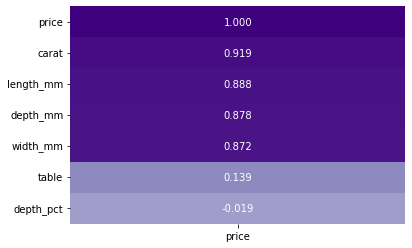

In [529]:
sns.heatmap(data=diamonds_correlation, cmap='Purples', cbar=False, annot=True, fmt='.3f', vmax=1, vmin=-1)

price has a <b>'Very Strong Positive'</b> correlation with <b>carat</b>

price has a <b>'Strong Positive'</b> correlation with <b>length_mm, depth_mm, width_mm</b>

In [530]:
#Splitting the data
x_train, x_test, y_train, y_test = train_test_split(diamonds[['carat']], diamonds[['price']], test_size=0.3, random_state=20)

In [531]:
#Create the model
model = LinearRegression()

#Fitting the training datasets
model.fit(x_train, y_train)

#Scoring the test dataset
model.score(x_test, y_test)

0.8449121232871877

In [532]:
#Scoring the train dataset
model.score(x_train, y_train)

0.8449365808381111

In [533]:
#Predicting
y_predicted = model.predict(x_test)
y_predicted

array([[ 7317.15093305],
       [ 1063.9694589 ],
       [ 9478.74452905],
       ...,
       [13338.73309334],
       [ 1835.96717176],
       [ 1295.56877276]])

In [534]:
#creating DataFrame
predicted = pd.DataFrame(y_predicted, columns=['price_predicted'])
predicted = predicted.round(2)
predicted.head()

,price_predicted
0,7317.15
1,1063.97
2,9478.74
3,214.77
4,14959.93


In [535]:
#combining the predicted data and actual data
combined = predicted.join([x_test.reset_index(drop=True), y_test.reset_index(drop=True)])
combined.head()

,price_predicted,carat,price
0,7317.15,1.22,5739.0
1,1063.97,0.41,827.0
2,9478.74,1.50,10374.0
3,214.77,0.30,789.0
4,14959.93,2.21,18276.0


In [536]:
#melting the price and predicted price into 1 column
melted = pd.melt(combined, id_vars=['carat'], value_vars=['price', 'price_predicted'], var_name='price_type', value_name='price_value')
melted.head()

,carat,price_type,price_value
0,1.22,price,5739.0
1,0.41,price,827.0
2,1.50,price,10374.0
3,0.30,price,789.0
4,2.21,price,18276.0


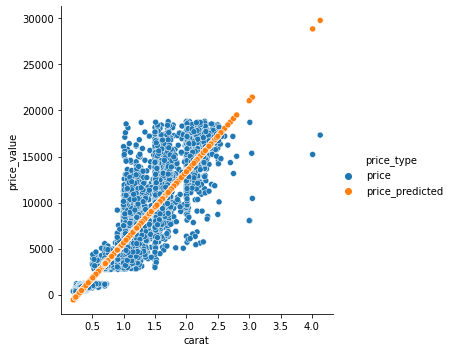

In [537]:
#plotting the data
sns.relplot(data=melted, x='carat', y='price_value', hue='price_type')

## Residual

<AxesSubplot:xlabel='residual', ylabel='Density'>

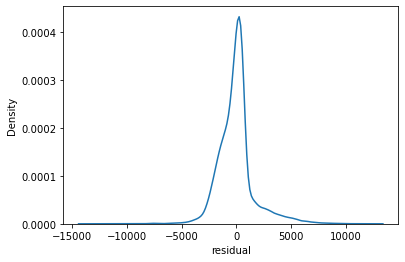

In [538]:
combined['residual'] = combined['price'] - combined['price_predicted']
sns.kdeplot(data=combined, x='residual')

# Multiple Linear Regression

In [539]:
diamonds.head()

,carat,cut,color,clarity,depth_pct,table,price,length_mm,width_mm,depth_mm
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [540]:
#Creating dummy variables.
#List of Categorical data is catCols (defined during examination of data earlier)
dummies = pd.get_dummies(diamonds[catCols])

diamonds_dummies = diamonds.drop(columns=catCols)
diamonds_dummies = diamonds_dummies.join(dummies)
diamonds_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41025 entries, 0 to 41153
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          41025 non-null  float64
 1   depth_pct      41025 non-null  float64
 2   table          41025 non-null  float64
 3   price          41025 non-null  float64
 4   length_mm      41025 non-null  float64
 5   width_mm       41025 non-null  float64
 6   depth_mm       41025 non-null  float64
 7   cut_Ideal      41025 non-null  uint8  
 8   cut_Premium    41025 non-null  uint8  
 9   cut_Very Good  41025 non-null  uint8  
 10  cut_Good       41025 non-null  uint8  
 11  cut_Fair       41025 non-null  uint8  
 12  color_D        41025 non-null  uint8  
 13  color_E        41025 non-null  uint8  
 14  color_F        41025 non-null  uint8  
 15  color_G        41025 non-null  uint8  
 16  color_H        41025 non-null  uint8  
 17  color_I        41025 non-null  uint8  
 18  color_

In [541]:
#rescaling the data and checking correlation
scaler = StandardScaler()

#Columns to rscale. These exclude the dependent variable, dummy variables and non-numeric columns
numCols = ['carat', 'depth_pct', 'table', 'length_mm', 'width_mm', 'depth_mm']

diamonds_dummies[numCols] = scaler.fit_transform(diamonds_dummies[numCols])

diamonds_dummies.head()

,carat,depth_pct,table,price,length_mm,width_mm,depth_mm,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,-1.237826,-0.183486,-1.132689,326.0,-1.571702,-1.524606,-1.578172,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-1.276594,-1.382391,1.584286,326.0,-1.620794,-1.637367,-1.736720,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,-1.237826,-3.427581,3.395603,327.0,-1.489882,-1.452117,-1.736720,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,-1.121522,0.451229,0.225799,334.0,-1.367153,-1.323247,-1.313926,0,1,0,...,1,0,0,0,0,0,1,0,0,0
4,-1.082754,1.085943,0.225799,335.0,-1.252606,-1.226594,-1.155379,0,0,0,...,0,1,0,0,0,0,0,0,1,0


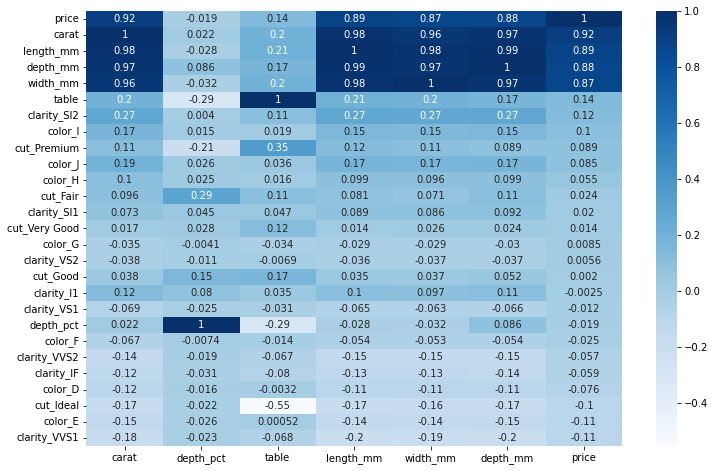

In [542]:
#checking correlation
plt.figure(figsize=(12, 8))
ax = sns.heatmap(diamonds_dummies.corr()[['carat', 'depth_pct', 'table', 'length_mm', 'width_mm', 'depth_mm', 'price']].sort_values(by='price', ascending=False), cmap='Blues', annot=True)
plt.show()


In [543]:
#Creating Model
diamondsTrain, diamondsTest = train_test_split(diamonds_dummies, test_size=0.25, random_state=20)

In [544]:
#Since the simple linear regression model above is model, i'll call this one multi_model
multi_model = LinearRegression()
testScores = []
trainScores = []

In [545]:
#For loop to check the best number of features to use
for i in range(1, len(diamondsTrain.columns)):
    fs = SelectKBest(score_func=mutual_info_regression, k=i)
    fs.fit(diamondsTrain.drop(columns=['price']), diamondsTrain['price'])

    x_train_fs = fs.transform(diamondsTrain.drop(columns=['price']))
    x_test_fs = fs.transform(diamondsTest.drop(columns=['price']))

    multi_model.fit(x_train_fs, diamondsTrain['price'])

    testScore = multi_model.score(x_test_fs, diamondsTest['price'])
    trainScore = multi_model.score(x_train_fs, diamondsTrain['price'])

    testScores.append(testScore)
    trainScores.append(trainScore)






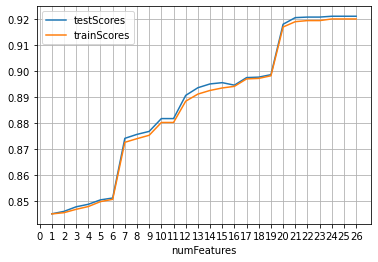

In [546]:
#plotting the scores
df = pd.DataFrame(data={'testScores':testScores, 'trainScores':trainScores})
df.reset_index(inplace=True)

df.rename(columns={'index':'numFeatures'}, inplace=True)

df.numFeatures = df.numFeatures + 1
ax = df.plot(x='numFeatures', y=['testScores', 'trainScores'])
ax.set_xticks(range(0, df['numFeatures'].max() + 1, 1))
ax.grid(True)
plt.show()

Based on my plot, 18 is best number of features to use for my Multiple Linear Regression Model

In [547]:
#final model
fs = SelectKBest(score_func=mutual_info_regression, k=18)
fs.fit(diamondsTrain.drop(columns=['price']), diamondsTrain['price'])

x_train_fs = fs.transform(diamondsTrain.drop(columns=['price']))
x_test_fs = fs.transform(diamondsTest.drop(columns=['price']))

finalModel = LinearRegression()

#fitting the model
finalModel.fit(x_train_fs, diamondsTrain['price'])

#Scoring th Test dataset
finalModel.score(x_test_fs, diamondsTest['price'])

0.8976022875739906

In [548]:
#Scoring the Train dataset
finalModel.score(x_train_fs, diamondsTrain['price'])

0.8971154000119045

In [549]:
#Predicting
y_predicted = finalModel.predict(x_test_fs)
y_predicted

array([ 6440.50680439,  1422.25467077, 10105.59080981, ...,
        9790.41406914,  8248.57946838, 12258.87427651])

In [559]:
predicted = pd.DataFrame(y_predicted, columns=['predictedPrice'])

# Convert x_test_fs to DataFrame with feature names after feature selection
x_test_fs_df = pd.DataFrame(x_test_fs, columns=diamondsTrain.drop(columns=['price']).columns[fs.get_support()])


final = predicted.join([x_test_fs_df.reset_index(drop=True), diamondsTest['price'].reset_index(drop=True)])

columns = ['carat', 'table', 'length_mm', 'width_mm', 'depth_mm', 'price', 'predictedPrice']
final[columns].head()

,carat,table,length_mm,width_mm,depth_mm,price,predictedPrice
0,0.681191,-0.679860,0.743789,0.706457,0.866104,5739.0,6440.506804
1,-0.888914,-0.679860,-0.941692,-0.896365,-0.864708,827.0,1422.254671
2,1.223943,0.678628,1.005611,0.915870,1.275685,10374.0,10105.590810
3,-1.102138,-0.679860,-1.244424,-1.210485,-1.287502,789.0,-739.708350
4,2.600208,-1.132689,2.069265,2.003212,2.068424,18276.0,15768.138378


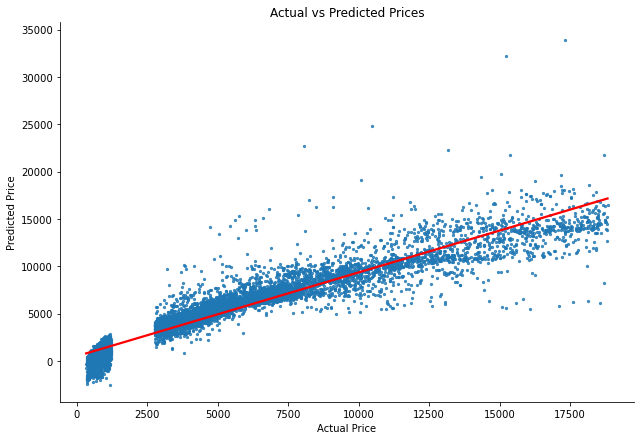

In [567]:
# Plotting predicted vs actual prices
sns.lmplot(data=final, x='price', y='predictedPrice', ci=None, aspect=1.5, height=6, scatter_kws={'s':5}, line_kws={'color':'red'})

# Customizing the plot
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

# Show the plot
plt.show()

## Residuals

<AxesSubplot:xlabel='residual', ylabel='Density'>

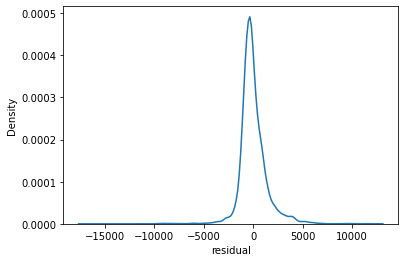

In [568]:
final['residual'] = final['price'] - final['predictedPrice']

sns.kdeplot(data=final, x='residual')